In [12]:
import os
import pandas as pd
import numpy as np
import joblib

In [13]:
FEATURES_PATH = "Data/mood/mood_features.csv"

In [14]:
mood_df = pd.read_csv(FEATURES_PATH)
mood_df

,filepath,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,Data\mood\happy\2_Hearts__feat__Gia_Koka_.wav,0.442474,0.086499,0.243560,0.006731,2688.529395,1.154453e+06,2532.131978,231190.813977,5522.790111,...,56.679207,-0.046256,64.824562,2.828764,63.164577,-1.363783,91.281883,3.853588,52.285278,happy
1,Data\mood\happy\3_Nights.wav,0.411487,0.089318,0.263768,0.009013,1900.053354,9.863172e+05,2305.371691,454605.208969,4111.584445,...,76.839005,-7.135399,65.956375,1.946735,65.854744,-4.116169,61.056702,-1.218556,62.685802,happy
2,Data\mood\happy\About_Damn_Time.wav,0.437611,0.093001,0.236785,0.012467,2363.778554,6.449610e+05,2591.498221,200912.809809,5229.976546,...,70.824554,-1.460927,74.595123,2.969061,71.113899,-1.003358,80.173645,6.032926,81.344078,happy
3,Data\mood\happy\Acapulco.wav,0.411258,0.092674,0.304560,0.013415,2841.691292,8.955200e+05,2874.137507,158004.849386,6375.646170,...,70.144379,-2.201804,67.084969,3.538890,75.496895,-4.569679,83.874275,2.643816,83.428978,happy
4,Data\mood\happy\All_I_Know_So_Far.wav,0.366621,0.091117,0.243035,0.010553,3008.268191,9.840627e+05,3096.063899,240220.331467,7017.279451,...,81.155128,-3.137104,107.800995,0.977395,104.016747,-4.452574,95.084244,1.883661,73.692345,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Data\mood\sad\You_-_Live.wav,0.321795,0.088514,0.180443,0.007013,2421.748421,5.672320e+05,2432.045997,244847.033616,5032.440133,...,81.607307,-4.512142,74.228806,2.212064,120.649132,-7.444134,102.444214,3.391250,115.680809,sad
301,Data\mood\sad\you_broke_me_first.wav,0.335297,0.091573,0.204328,0.009563,1613.212353,6.823744e+05,2122.869731,489252.222804,3423.518692,...,66.419846,-5.838638,58.436424,2.345034,59.957016,-2.353762,71.695595,1.673606,66.462402,sad
302,Data\mood\sad\You_There.wav,0.272496,0.083201,0.118449,0.004280,1355.364511,5.401733e+05,1802.419427,441032.725359,2529.129354,...,63.135403,-6.498828,96.920433,-1.142739,78.821297,-2.736666,50.496086,-3.005856,55.316883,sad
303,Data\mood\sad\you_were_good_to_me.wav,0.273393,0.089862,0.096010,0.005700,1285.045732,7.427609e+05,1814.381313,564837.159801,2508.331254,...,86.360764,-8.420147,76.910667,-1.590486,77.398956,-4.541237,88.766594,-1.820612,115.930359,sad


In [15]:
mood_labels = mood_df.iloc[:,-1]
mood_labels

0      happy
1      happy
2      happy
3      happy
4      happy
       ...  
300      sad
301      sad
302      sad
303      sad
304      sad
Name: label, Length: 305, dtype: object

In [16]:
mood_features = mood_df.iloc[:, 1:-1]
mood_features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.442474,0.086499,0.243560,0.006731,2688.529395,1.154453e+06,2532.131978,231190.813977,5522.790111,3.720901e+06,...,4.548615,56.679207,-0.046256,64.824562,2.828764,63.164577,-1.363783,91.281883,3.853588,52.285278
1,0.411487,0.089318,0.263768,0.009013,1900.053354,9.863172e+05,2305.371691,454605.208969,4111.584445,5.047356e+06,...,0.191635,76.839005,-7.135399,65.956375,1.946735,65.854744,-4.116169,61.056702,-1.218556,62.685802
2,0.437611,0.093001,0.236785,0.012467,2363.778554,6.449610e+05,2591.498221,200912.809809,5229.976546,2.763840e+06,...,1.455465,70.824554,-1.460927,74.595123,2.969061,71.113899,-1.003358,80.173645,6.032926,81.344078
3,0.411258,0.092674,0.304560,0.013415,2841.691292,8.955200e+05,2874.137507,158004.849386,6375.646170,2.901190e+06,...,3.142100,70.144379,-2.201804,67.084969,3.538890,75.496895,-4.569679,83.874275,2.643816,83.428978
4,0.366621,0.091117,0.243035,0.010553,3008.268191,9.840627e+05,3096.063899,240220.331467,7017.279451,3.830205e+06,...,4.315975,81.155128,-3.137104,107.800995,0.977395,104.016747,-4.452574,95.084244,1.883661,73.692345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.321795,0.088514,0.180443,0.007013,2421.748421,5.672320e+05,2432.045997,244847.033616,5032.440133,2.920844e+06,...,-0.876777,81.607307,-4.512142,74.228806,2.212064,120.649132,-7.444134,102.444214,3.391250,115.680809
301,0.335297,0.091573,0.204328,0.009563,1613.212353,6.823744e+05,2122.869731,489252.222804,3423.518692,4.292924e+06,...,-1.233058,66.419846,-5.838638,58.436424,2.345034,59.957016,-2.353762,71.695595,1.673606,66.462402
302,0.272496,0.083201,0.118449,0.004280,1355.364511,5.401733e+05,1802.419427,441032.725359,2529.129354,3.730601e+06,...,-0.917481,63.135403,-6.498828,96.920433,-1.142739,78.821297,-2.736666,50.496086,-3.005856,55.316883
303,0.273393,0.089862,0.096010,0.005700,1285.045732,7.427609e+05,1814.381313,564837.159801,2508.331254,4.403093e+06,...,-3.673853,86.360764,-8.420147,76.910667,-1.590486,77.398956,-4.541237,88.766594,-1.820612,115.930359


In [17]:
mood_fps = mood_df.iloc[:, 0]
mood_fps

0      Data\mood\happy\2_Hearts__feat__Gia_Koka_.wav
1                       Data\mood\happy\3_Nights.wav
2                Data\mood\happy\About_Damn_Time.wav
3                       Data\mood\happy\Acapulco.wav
4              Data\mood\happy\All_I_Know_So_Far.wav
                           ...                      
300                     Data\mood\sad\You_-_Live.wav
301             Data\mood\sad\you_broke_me_first.wav
302                      Data\mood\sad\You_There.wav
303            Data\mood\sad\you_were_good_to_me.wav
304    Data\mood\sad\_I_should__take_better_care.wav
Name: filepath, Length: 305, dtype: object

In [18]:
from sklearn.preprocessing import StandardScaler

mood_scaler = StandardScaler()
mood_features_scaled = mood_scaler.fit_transform(mood_features)
mood_features_scaled

joblib.dump(mood_scaler, 'Util/mood_scaler.joblib')

['Util/mood_scaler.joblib']

In [19]:
from sklearn.preprocessing import LabelEncoder

mood_convertor = LabelEncoder()
mood_labels = mood_convertor.fit_transform(mood_labels)
mood_labels = pd.DataFrame(data=mood_labels, columns=['label'])
mood_labels

joblib.dump(mood_convertor, 'Util/mood_convertor.joblib')

['Util/mood_convertor.joblib']

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mood_features_scaled)
pcaDF = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])

pcaDF = pd.concat([pcaDF, mood_labels], axis=1)
pcaDF

,PCA 1,PCA 2,label
0,-5.879501,-0.228241,0
1,-1.290361,1.192715,0
2,-4.256919,1.220381,0
3,-5.414329,1.185305,0
4,-4.499960,0.893940,0
...,...,...,...
300,-0.516563,0.259246,1
301,0.188641,-2.729700,1
302,2.843492,-4.887073,1
303,3.972851,-3.831892,1


['happy' 'sad']


Text(0, 0.5, 'Principal Component 2')

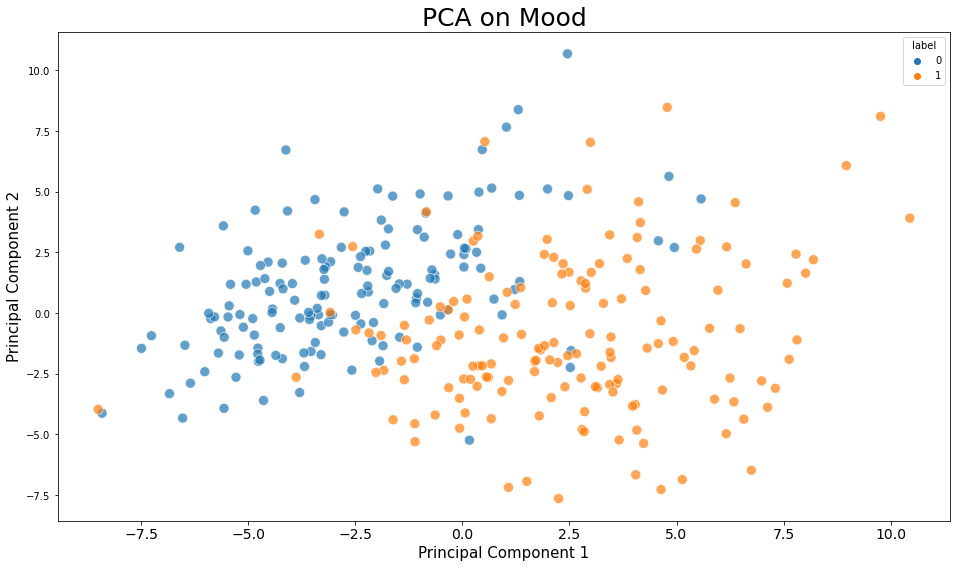

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PCA 1", y = "PCA 2", data = pcaDF, hue = "label", alpha = 0.7,
               s = 100);

print(mood_convertor.classes_)
plt.title('PCA on Mood', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_labels, test_size=0.3, random_state=0) # random state may not be wise

In [23]:
print(f"Size of dataset: {len(mood_features_scaled)}")
print(f"Size of training set: {len(X_train)}")
print(f"Size of test set: {len(X_test)}")

Size of dataset: 305
Size of training set: 213
Size of test set: 92


**K-NEAREST NEIGHBORS**





In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

max_neighbors = 50
knn_num_neighbors = []
knn_train_accs = []
knn_test_accs = []

for i in range(2, max_neighbors + 1): # from 2 neighbors to 20 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    
    train_pred = knn_model.predict(X_train)
    test_pred = knn_model.predict(X_test)
    
    knn_num_neighbors.append(i)
    knn_train_accs.append(metrics.accuracy_score(y_train, train_pred))
    knn_test_accs.append(metrics.accuracy_score(y_test, test_pred))
    

C:\Users\18582\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\18582\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\18582\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\18582\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [25]:
print(knn_num_neighbors)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [26]:
print(knn_train_accs)

[0.8967136150234741, 0.9154929577464789, 0.8826291079812206, 0.9154929577464789, 0.8732394366197183, 0.892018779342723, 0.8873239436619719, 0.9107981220657277, 0.9014084507042254, 0.9014084507042254, 0.892018779342723, 0.9014084507042254, 0.8873239436619719, 0.8826291079812206, 0.8826291079812206, 0.8967136150234741, 0.892018779342723, 0.8873239436619719, 0.8826291079812206, 0.8826291079812206, 0.8967136150234741, 0.892018779342723, 0.892018779342723, 0.8873239436619719, 0.8779342723004695, 0.8873239436619719, 0.8779342723004695, 0.8779342723004695, 0.8779342723004695, 0.8779342723004695, 0.8732394366197183, 0.8779342723004695, 0.8685446009389671, 0.8732394366197183, 0.8685446009389671, 0.8779342723004695, 0.8685446009389671, 0.8685446009389671, 0.8779342723004695, 0.8732394366197183, 0.8591549295774648, 0.8685446009389671, 0.863849765258216, 0.8732394366197183, 0.8732394366197183, 0.8732394366197183, 0.8685446009389671, 0.8732394366197183, 0.8685446009389671]


In [27]:
print(knn_test_accs)

[0.8369565217391305, 0.8913043478260869, 0.8804347826086957, 0.9021739130434783, 0.8913043478260869, 0.9021739130434783, 0.9021739130434783, 0.8913043478260869, 0.8804347826086957, 0.8804347826086957, 0.8695652173913043, 0.8695652173913043, 0.8586956521739131, 0.8695652173913043, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8369565217391305, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8369565217391305, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8586956521739131, 0.8478260869565217, 0.8586956521739131, 0.8478260869565217, 0.8586956521739131, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8586956521739131, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217]


In [28]:
print(f"Best test accuracy is {np.max(knn_test_accs)} at num neighbors = {knn_num_neighbors[np.argmax(knn_test_accs)]}")

Best test accuracy is 0.9021739130434783 at num neighbors = 5


In [29]:
print(f"Choosing num neighbors 11 with train accuracy of {knn_train_accs[9]} and test accuracy of {knn_test_accs[8]}")

Choosing num neighbors 11 with train accuracy of 0.9014084507042254 and test accuracy of 0.8804347826086957


**SUPPORT VECTOR MACHINE (SVM)**

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_train_pred = svc.predict(X_train)
svc_test_pred = svc.predict(X_test)

print(f"SVC Train Acc: {metrics.accuracy_score(y_train, svc_train_pred)}")
print(f"SVC Test Acc: {metrics.accuracy_score(y_test, svc_test_pred)}")

SVC Train Acc: 0.9765258215962441
SVC Test Acc: 0.8804347826086957


C:\Users\18582\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
import sklearn.metrics as metrics

svc_predictions = svc.predict(X_test)
print(f"SVC accuracy: {metrics.accuracy_score(y_test, svc_predictions)}")
print("----")
print(mood_convertor.classes_)
print(metrics.classification_report(y_test, svc_predictions))

SVC accuracy: 0.8804347826086957
----
['happy' 'sad']
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.91      0.85      0.88        48

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



<AxesSubplot:>

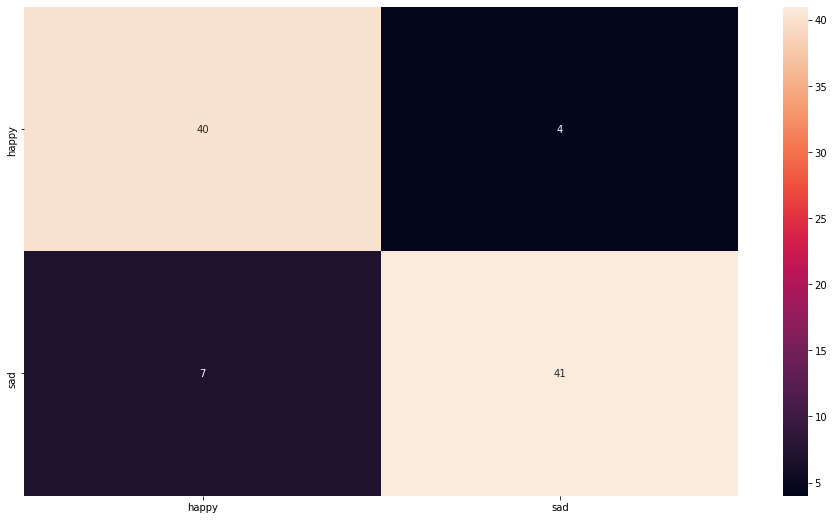

In [32]:
matrix = metrics.confusion_matrix(y_test, svc_predictions)
df_cm = pd.DataFrame(matrix, index = mood_convertor.classes_, columns = mood_convertor.classes_)
plt.figure(figsize = (16, 9))
sns.heatmap(df_cm, annot=True)

**NAIVE BAYES**

Could be advantageous since our dataset is quite small

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

print(f"Naive Bayes Train Acc: {metrics.accuracy_score(y_train, gnb_train_pred)}")
print(f"Naive Bayes Test Acc: {metrics.accuracy_score(y_test, gnb_test_pred)}")

Naive Bayes Train Acc: 0.892018779342723
Naive Bayes Test Acc: 0.8369565217391305


C:\Users\18582\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**NEURAL NETWORK**

In [34]:
import tensorflow as tf

num_epochs = 100
batch_size = 4

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(2, activation="softmax") 
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 0.9444 - accuracy: 0.4225 - val_loss: 0.8455 - val_accuracy: 0.4674
Epoch 2/100
54/54 [==============================] - 0s 973us/step - loss: 0.8262 - accuracy: 0.4977 - val_loss: 0.7441 - val_accuracy: 0.5217
Epoch 3/100
54/54 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.5587 - val_loss: 0.6671 - val_accuracy: 0.5978
Epoch 4/100
54/54 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6056 - val_loss: 0.6015 - val_accuracy: 0.6739
Epoch 5/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.6854 - val_loss: 0.5501 - val_accuracy: 0.7065
Epoch 6/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7418 - val_loss: 0.5078 - val_accuracy: 0.7609
Epoch 7/100
54/54 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7559 - val_loss: 0.4717 - val_accuracy: 0.7826
Epoch 8/100

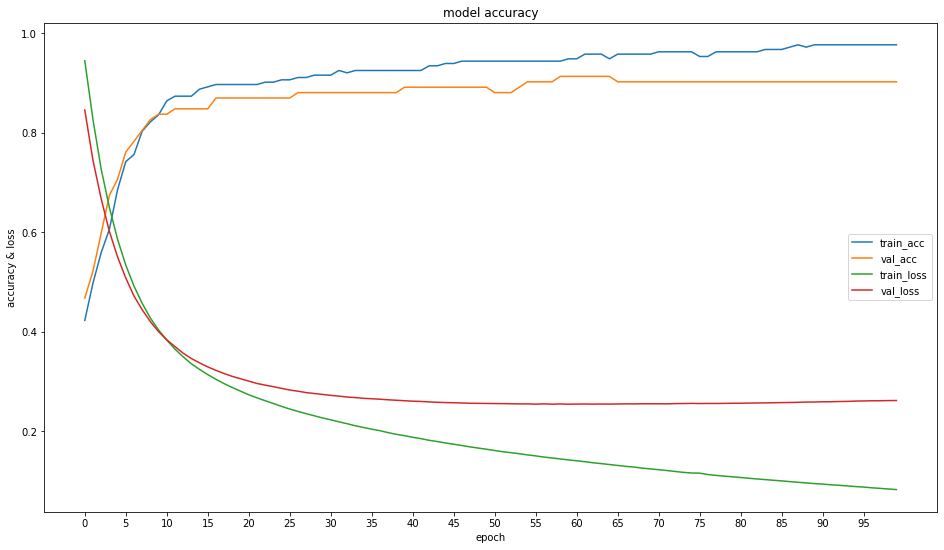

In [35]:
plt.figure(figsize = (16, 9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy & loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, num_epochs, 5))
plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='center right')
plt.show()

In [36]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1856      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________


In [37]:
import sklearn.metrics as metrics

nn_predictions = np.argmax(nn_model.predict(X_test), axis=1)
print(f"Neural network accuracy: {metrics.accuracy_score(y_test, nn_predictions)}")
print(f"Neural network loss: {history.history['val_loss'][-1]}")
print("----")
print(mood_convertor.classes_)
print(metrics.classification_report(y_test, nn_predictions))

Neural network accuracy: 0.9021739130434783
Neural network loss: 0.26153382658958435
----
['happy' 'sad']
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.91      0.90      0.91        48

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



<AxesSubplot:>

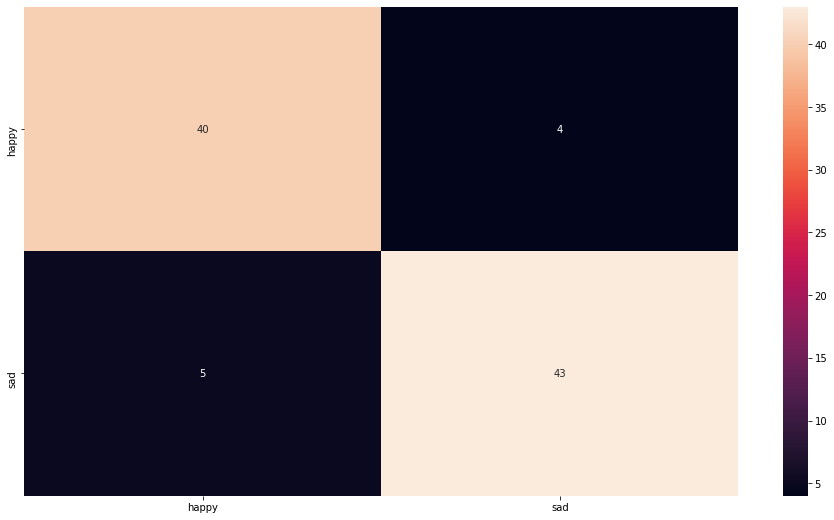

In [38]:
matrix = metrics.confusion_matrix(y_test, nn_predictions)
df_cm = pd.DataFrame(matrix, index = mood_convertor.classes_, columns = mood_convertor.classes_)
plt.figure(figsize = (16, 9))
sns.heatmap(df_cm, annot=True)

In [39]:
nn_model.save("Models/nn_mood_classifier")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Models/nn_mood_classifier\assets


**TESTING WITH NOVEL DATA**

In [25]:
from audio_feature_extract import extract_features_from_class

test_happy = "Data/mood/test_mood/happy.wav"
test_sad = "Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav"

happy_feat = extract_features_from_class(test_happy)
sad_feat = extract_features_from_class(test_sad)
print(happy_feat)
print(sad_feat)

Processing file: Data/mood/test_mood/happy.wav
Completed: Data/mood/test_mood/happy.wav
Processing file: Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav
Completed: Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav
['Data/mood/test_mood/happy.wav', 0.37712032, 0.0883292, 0.19149117, 0.00506264, 2656.417026195629, 812548.124936226, 2899.019883931694, 282569.28058901324, 6227.3491494921345, 4590867.447006906, 0.10565880072578292, 0.003154697140096682, 1.4174339e-05, 0.018118395, -9.820261e-06, 0.010762988, 161.4990234375, -77.42367, 8155.66, 81.14548, 803.6214, 26.536764, 783.4298, 19.051216, 363.442, 11.499816, 206.60345, -0.51844907, 173.44073, -5.4729466, 156.351, 6.8570657, 92.28291, -3.3651109, 94.77008, -1.5689436, 90.8409, -7.8087473, 63.20484, 5.248359, 49.909863, -7.660731, 48.48534, -0.23719047, 62.08439, -1.3004712, 65.336655, 0.8048731, 61.81641, -5.0864525, 70.61172, 4.0128965, 62.254936, -2.1214793, 62

In [26]:
happy_feat = happy_feat[1:] # removing fps
sad_feat = sad_feat[1:]
print(happy_feat)
print(sad_feat)

[0.37712032, 0.0883292, 0.19149117, 0.00506264, 2656.417026195629, 812548.124936226, 2899.019883931694, 282569.28058901324, 6227.3491494921345, 4590867.447006906, 0.10565880072578292, 0.003154697140096682, 1.4174339e-05, 0.018118395, -9.820261e-06, 0.010762988, 161.4990234375, -77.42367, 8155.66, 81.14548, 803.6214, 26.536764, 783.4298, 19.051216, 363.442, 11.499816, 206.60345, -0.51844907, 173.44073, -5.4729466, 156.351, 6.8570657, 92.28291, -3.3651109, 94.77008, -1.5689436, 90.8409, -7.8087473, 63.20484, 5.248359, 49.909863, -7.660731, 48.48534, -0.23719047, 62.08439, -1.3004712, 65.336655, 0.8048731, 61.81641, -5.0864525, 70.61172, 4.0128965, 62.254936, -2.1214793, 62.411655, 5.409682, 94.611824]
[0.31936818, 0.08416196, 0.17938414, 0.008331264, 1898.5505184328338, 483702.60568803723, 2178.017670819264, 251447.49112101024, 3864.675219143102, 2776837.379906303, 0.08312009892954397, 0.0019701530021292973, -4.2291651e-07, 0.02602272, -3.1918644e-05, 0.005177266, 117.45383522727273, -93

In [27]:
happy_feat = mood_scaler.transform([happy_feat])
sad_feat = mood_scaler.transform([sad_feat])
print(happy_feat)
print(sad_feat)

[[ 0.57890715 -0.49425098 -0.30796569 -1.17369843  1.06643196 -0.05749166
   1.50718193 -0.570448    1.37727598  0.48253318  0.8332486  -0.1894698
  -0.05366641 -1.0986346  -0.03016252  0.11393838  1.96113289  0.50796374
  -0.39201712 -0.85884035 -1.22098287  1.29202026  0.69734395  0.03051447
   0.21803638  0.75511496 -0.11048375 -0.94562701 -0.32688882 -0.8614877
   0.00460473  0.84216992 -1.12189512  0.09365877 -0.77926387 -0.94432222
  -0.84369801 -0.55745463 -1.44332655  1.0739255  -1.82289686 -0.65004614
  -1.70272672 -0.10075419 -1.1101915   0.81603203 -0.68005276  0.24699071
  -0.85312655 -0.09096995 -0.43571839  0.83214578 -0.81088     0.62961799
  -0.81340382  1.3650732   0.24901916]]
[[-5.54460285e-01 -1.42266983e+00 -5.08558029e-01 -4.29932591e-01
  -3.17066392e-01 -1.31103194e+00 -3.67660055e-01 -7.54791807e-01
  -4.29414401e-01 -9.06310096e-01 -6.57281137e-04 -8.11473090e-01
  -8.08092640e-02 -6.00099312e-01 -8.32245598e-02 -6.47433057e-01
  -3.37521675e-01  2.79751575e-0

C:\Users\18582\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\18582\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**- Neural Network Novel**

In [28]:
nn_happy_pred = nn_model.predict(happy_feat)
nn_happy_pred_eng = mood_convertor.inverse_transform(np.argmax(nn_happy_pred, axis=1))[0]
nn_happy_pred_conf = nn_happy_pred[0][np.argmax(nn_happy_pred, axis=1)[0]]
print(f"NN Predict: {nn_happy_pred_eng}")
print(f"Probability: {nn_happy_pred_conf}")

NN Predict: happy
Probability: 0.7250308394432068


In [29]:
nn_sad_pred = nn_model.predict(sad_feat)
nn_sad_pred_eng = mood_convertor.inverse_transform(np.argmax(nn_sad_pred, axis=1))[0]
nn_sad_pred_conf = nn_sad_pred[0][np.argmax(nn_sad_pred, axis=1)[0]]
print(f"NN Predict: {nn_sad_pred_eng}")
print(f"Probability: {nn_sad_pred_conf}")

NN Predict: sad
Probability: 0.7430641055107117
